# Exercise 1

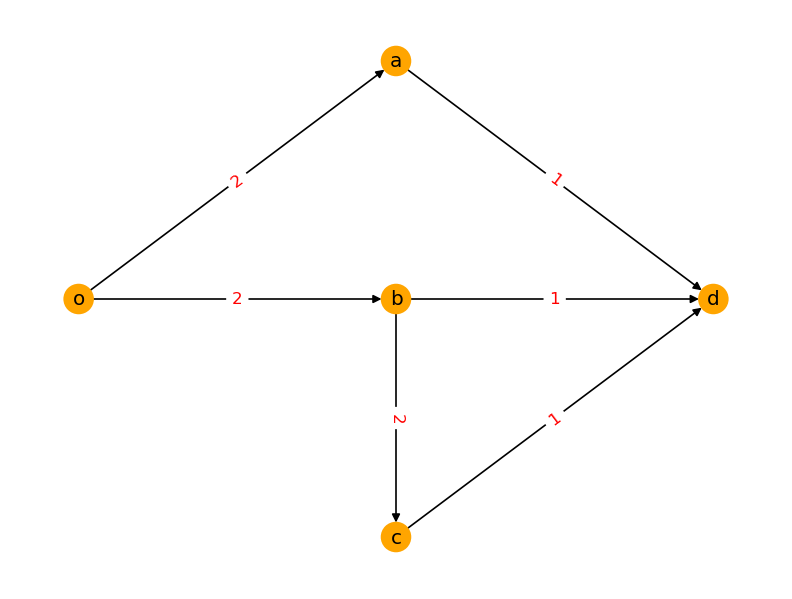

In [39]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

color_map=['orange','orange','orange','orange','orange']
G = nx.DiGraph()
G.add_edges_from([('o','a'),('o','b'),('b','d'),('a','d'),('b','c'),('c','d')])

pos =pos = {'o': [0,2], 'a': [2,4], 'b': [2,2], 'c': [2,0], 'd': [4,2] }

G['o']['a']['capacity']=2
G['o']['b']['capacity']=2
G['b']['d']['capacity']=1
G['a']['d']['capacity']=1
G['b']['c']['capacity']=2
G['c']['d']['capacity']=1
plt.figure(dpi=120)
nx.draw(G,pos, with_labels = True,  node_color=color_map)
dd=nx.draw_networkx_edge_labels(G,pos,edge_labels={('o','a'):'2',
('o','b'):'2',('b','d'):'1',('a','d'):'1',
('b','c'):'2', ('c','d'):'1'},font_color='red')
# plt.savefig('C:/Users/Chiara/Desktop/network/fig/graph1.png')


**What is the minimum aggregate capacity that needs to be removed for no feasible flow from
o to d to exist?**

Looking at the min-cut of the network we can notice that the botteleneck is situeted between the sets of nodes $\{o, a\}$, $\{b, c, d\}$ and also $\{o, b, a, c\}$, $\{d\}$. The minimum aggregate capacity that we need to remove is equal to 3, associated respectivly to the edges $(o,b)$, $(a, d)$ and  $(c, d)$,  $(b, d)$,  $(a, d)$. 

- $U=\{o\}, U^C=\{a, b, c, d\}$ -> $C_U = 4$
- $U=\{o, a\}, U^C=\{b, c, d\}$ -> $C_U = 3$
- $U=\{o, c\}, U^C=\{b, a, d\}$ -> $C_U = 5$
- $U=\{o, b\}, U^C=\{a, c, d\}$ -> $C_U = 5$
- $U=\{o, a, c\}, U^C=\{b, d\}$ -> $C_U = 4$
- $U=\{o, b, a\}, U^C=\{c, d\}$ -> $C_U = 4$ 
- $U=\{o, b, c\}, U^C=\{a, d\}$ -> $C_U = 4$ 
- $U=\{o, b, a ,c\}, U^C=\{d\}$ -> $C_U = 3$ 

**What is the maximum aggregate capacity that can be removed from the links without affecting the maximum throughput from o to d?**

First of all we have to find the maximal throughput that is equal to the min-cut capacity , so 3. 
The max-cut is between the set $\{o, b\}$, $\{a, c, d\}$ so we can start reducing the capacity in one of the edge of this two sets, considering the in-capacity and out-capacity of the nodes. We can see that the edge e1 have capacity 2 while the edge e2 1, so we can start removing capacity 1 on $(o, a)$. Now we recompute the min-cut capacity

- $U=\{o\}, U^C=\{a, b, c, d\}$ -> $C_U = 3$
- $U=\{o, a\}, U^C=\{b, c, d\}$ -> $C_U = 3$
- $U=\{o, b\}, U^C=\{a, c, d\}$ -> $C_U = 4$
- $U=\{o, c\}, U^C=\{b, a, d\}$ -> $C_U = 4$
- $U=\{o, a, c\}, U^C=\{b, d\}$ -> $C_U = 3$
- $U=\{o, b, a\}, U^C=\{c, d\}$ -> $C_U = 4$ 
- $U=\{o, b, c\}, U^C=\{a, d\}$ -> $C_U = 4$ 
- $U=\{o, b, a ,c\}, U^C=\{d\}$ -> $C_U = 3$ 

We can notice that now the max-cut is 4, we can procide removing 1 capacity from one of the edge between the set of nodes with cut-capacity equal to 4. The only edge where we can remove capacity is the edge e5 (bc) because is the only edge in which the incoming capacity is greater than the outcoming capacity.

- $U=\{o\}, U^C=\{a, b, c, d\}$ -> $C_U = 3$
- $U=\{o, a\}, U^C=\{b, c, d\}$ -> $C_U = 3$
- $U=\{o, b\}, U^C=\{a, c, d\}$ -> $C_U = 3$
- $U=\{o, c\}, U^C=\{b, a, d\}$ -> $C_U = 3$
- $U=\{o, a, c\}, U^C=\{b, d\}$ -> $C_U = 3$
- $U=\{o, b, a\}, U^C=\{c, d\}$ -> $C_U = 3$ 
- $U=\{o, b, c\}, U^C=\{a, d\}$ -> $C_U = 3$ 
- $U=\{o, b, a ,c\}, U^C=\{d\}$ -> $C_U = 3$ 

Now the cut-capacity of all the sets is equal to 3.
Calculating the maximum flow with the functions `networkx.algorithms.flow.maximum_flow` we can notice that the capacity removed are exactly the one explained before.
So as can be seen from the calculations made the maximum aggregate capacity that can be removed from the links without affecting the maximum throughput from o to d is 2.

In [40]:
#mi creo una funzione che passato un grafo e un dizionario che ha come chiave un nodo e come valore un dizionario con
#i nodi che raggiunge come chiave e come valore le capacità su gli edge
#ritorna un dizionario che ha come chiave le tuble di due nodi (source,target) e come valore la capacità sull'edge che li collega
def dictionary_edge_label(diz, Graph):
    dic={}
    for o,d in diz.items():
        for dd in d.items():
            Graph.add_edge(o, dd[0],capacity=dd[1])
            dic[(o,dd[0])]=dd[1]
    return dic  

def dict_edge_lab(lis, graph):
    dic={}
    for e in lis:
        dic[(e[0],e[1])]=graph[e[0]][e[1]]['capacity']
    return dic    

{'o': {'a': 1, 'b': 2}, 'a': {'d': 1}, 'b': {'d': 1, 'c': 1}, 'd': {}, 'c': {'d': 1}}


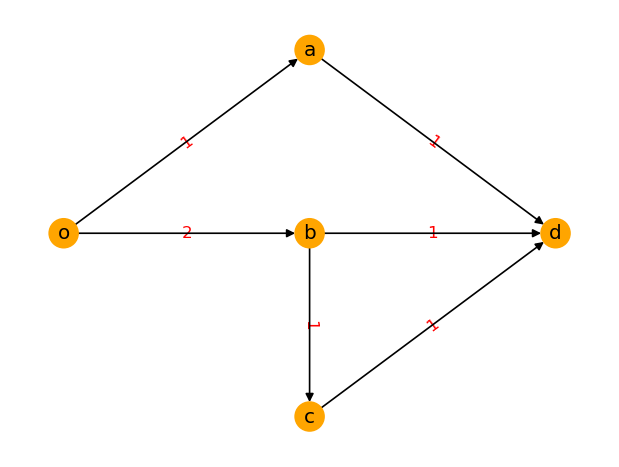

In [41]:
m_f = nx.algorithms.flow.maximum_flow(G, 'o','d')
print(m_f[1])

G2 = nx.DiGraph()
plt.figure(dpi=120)
nx.draw_networkx_edge_labels(G,pos,edge_labels=dictionary_edge_label(m_f[1],G2),font_color='red')

nx.draw(G2,pos,node_color=color_map, with_labels = True)
# plt.savefig('C:/Users/Chiara/Desktop/network/fig/graph2.png')

    

**You are given x > 0 extra units of capacity. How should you distribute them in order to maximize the throughput that can be sent from o to d? Plot the maximum throughput from o to d as a function of x ≥ 0.**


After computing the initial capacities we can see that the maximal throughput that can be send from o to d is 3. Now suppose to want add a capacity one, we notice that there are two min-cut

- $U=\{o, a\}, U^C=\{b, c, d\}$ -> $C_U = 3$   -->   $C_U = c(a, d) + c(o, b)$
- $U=\{o, b, a ,c\}, U^C=\{d\}$ -> $C_U = 3$   -->   $C_U = c(a, d) + c(b, d) + c(c,d)$

both share the link (a,d) so we can improve the capacity of the two adding the capacity on the edge (a,d).

The capacities became:

- $U=\{o\}, U^C=\{a, b, c, d\}$ --> $C_U = 4$
- $U=\{o, a\}, U^C=\{b, c, d\}$ --> $C_U = 4$
- $U=\{o, b\}, U^C=\{a, c, d\}$ --> $C_U = 5$
- $U=\{o, c\}, U^C=\{b, a, d\}$ --> $C_U = 5$ 
- $U=\{o, a, c\}, U^C=\{b, d\}$ --> $C_U = 5$ 
- $U=\{o, b, a\}, U^C=\{c, d\}$ --> $C_U = 5$ 
- $U=\{o, b, c\}, U^C=\{a, d\}$ --> $C_U = 4$ 
- $U=\{o, b, a ,c\}, U^C=\{d\}$ --> $C_U = 4$ 

now consider the new min-cuts, as we can see there are 4, to decide where to increase the capacity we choose from one of the link present within more min-cuts

- $U=\{o\}, U^C=\{a, b, c, d\}$ -> $C_U = 4$  --> $C_U = c(o, a) + c(o, b)$
- $U=\{o, a\}, U^C=\{b, c, d\}$ -> $C_U = 4$  --> $C_U = c(o, b) + c(a, d)$
- $U=\{o, b, c\}, U^C=\{a, d\}$ -> $C_U = 4$  --> $C_U = c(o, a) + c(b, d) + c(c, d)$
- $U=\{o, b, a ,c\}, U^C=\{d\}$ -> $C_U = 4$  --> $C_U = c(a, d) + c(b, d) + c(c, d)$


We choose arbitrarily to add 1 capacity to the edge (o, a) and recomput the min-cut


- $U=\{o\}, U^C=\{a, b, c, d\}$ --> $C_U = 5$
- $U=\{o, a\}, U^C=\{b, c, d\}$ --> $C_U = 4$
- $U=\{o, b\}, U^C=\{a, c, d\}$ --> $C_U = 6$
- $U=\{o, c\}, U^C=\{b, a, d\}$ --> $C_U = 6$
- $U=\{o, a, c\}, U^C=\{b, d\}$ --> $C_U = 5$
- $U=\{o, b, a\}, U^C=\{c, d\}$ --> $C_U = 5$ 
- $U=\{o, b, c\}, U^C=\{a, d\}$ --> $C_U = 6$ 
- $U=\{o, b, a ,c\}, U^C=\{d\}$ --> $C_U = 4$ 

Considering the two min-cut


- $U=\{o, a\}, U^C=\{b, c, d\}$ --> $C_U = 4$ --> $C_U = c(a, d) + c(o, b)$
- $U=\{o, b, a ,c\}, U^C=\{d\}$ --> $C_U = 4$ --> $C_U = c(a, d) + c(b, d) + c(c,d)$


As can be seen the only edge in common is (a, d), by increasing its capacity the throurghput increases to 5


- $U=\{o\}, U^C=\{a, b, c, d\}$ --> $C_U = 5$
- $U=\{o, a\}, U^C=\{b, c, d\}$ --> $C_U = 5$
- $U=\{o, b\}, U^C=\{a, c, d\}$ --> $C_U = 6$
- $U=\{o, c\}, U^C=\{b, a, d\}$ --> $C_U = 6$
- $U=\{o, a, c\}, U^C=\{b, d\}$ --> $C_U = 6$
- $U=\{o, b, a\}, U^C=\{c, d\}$ --> $C_U = 6$ 
- $U=\{o, b, c\}, U^C=\{a, d\}$ --> $C_U = 6$
- $U=\{o, b, a ,c\}, U^C=\{d\}$ --> $C_U = 5$

Looking again at the min-cut

- $U=\{o\}, U^C=\{a, b, c, d\}$ --> $C_U = 5$  --> $C_U = c(o, a) + c(o, b)$
- $U=\{o, a\}, U^C=\{b, c, d\}$ --> $C_U = 5$  --> $C_U = c(a, d) + c(o, b)$
- $U=\{o, b, a ,c\}, U^C=\{d\}$ --> $C_U = 5$  --> $C_U = c(a, d) + c(b, d) + c(c,d)$


We can proceed in the same way as before, going to increase the edges in common within the min-cuts. As we proceed we might notice that, with the exception of the first capacity inserted, subsequently every 2 capacities inserted the througput increases by 1.

In [42]:
def fun_shaf(mc):
    possibilities = list()
    for p in mc[0]:
        for s in mc[1]:
            possibilities.append((p,s))
    right_pos =list(set(G3.edges) & set(possibilities)) 
    return list(right_pos)[0]

[('o', 'a'), ('o', 'b'), ('a', 'd'), ('b', 'd'), ('b', 'c'), ('c', 'd')]
[4, 4, 5, 5, 5, 6, 6, 7, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


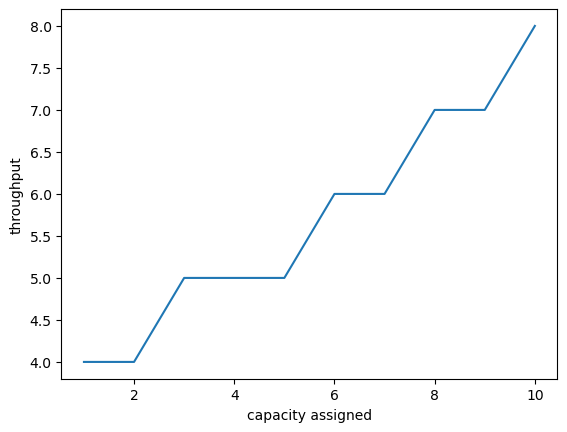

{('o', 'a'): Text(1.0, 3.0, '5'),
 ('o', 'b'): Text(1.0, 2.0, '3'),
 ('a', 'd'): Text(3.0, 3.0, '5'),
 ('b', 'd'): Text(3.0, 2.0, '1'),
 ('b', 'c'): Text(2.0, 1.0, '2'),
 ('c', 'd'): Text(3.0, 1.0, '3')}

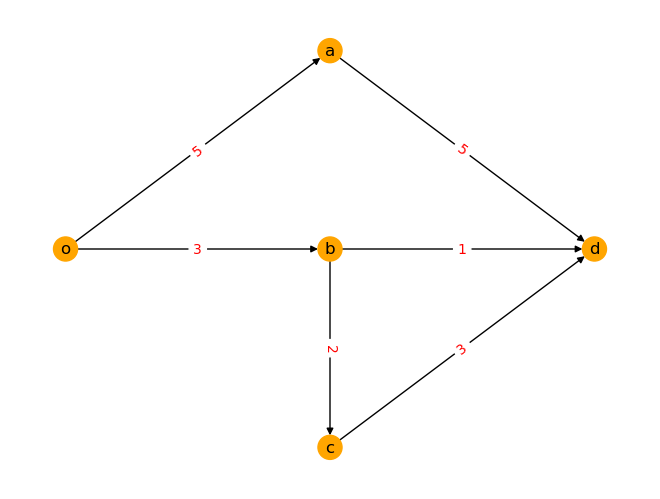

In [43]:
x=10
G3=G
print(G3.edges)
diz={}
import random 

x_throu=list()
y_cap=list()

for i in range(x):
    #print(i+1)
    min_cut_iniziale =  nx.algorithms.flow.maximum_flow(G3, 'o','d')[0]
    b = False
    for t in G3.edges:
        #print(list(nx.minimum_cut(G3, "o", "d")))
        G3[t[0]][t[1]]['capacity']+=1
        min_cut_dopo = nx.algorithms.flow.maximum_flow(G3, 'o','d')[0]
        if(min_cut_dopo>min_cut_iniziale):
            #print('aumentata subito',t[0],t[1] )
            min_cut_iniziale = min_cut_dopo
            b=True
            
        else:
            G3[t[0]][t[1]]['capacity']-=1 
            
    if(b==False):
       
        mc1 =  list(nx.minimum_cut(G3, "o", "d")[1])
        choise = fun_shaf(mc1)
        G3[choise[0]][choise[1]]['capacity']+=1
        #print('capacita aumentata random',choise[0],choise[1])
        
    y_cap.append(i+1)
    x_throu.append(nx.algorithms.flow.maximum_flow(G3, 'o','d')[0])


    
print(x_throu)
print(y_cap)
plt.plot(y_cap, x_throu)
plt.xlabel('capacity assigned')
plt.ylabel('throughput')
plt.savefig('plot.png',dpi=300,bbox_inches='tight')
plt.show()
G3=G
nx.draw(G3,pos, with_labels = True, node_color=color_map)
nx.draw_networkx_edge_labels(G3,pos,edge_labels=dict_edge_lab(G3.edges, G3),font_color='red')  

#m_f2 = nx.algorithms.flow.maximum_flow(G3, 'o','d')              

# Exercise 2

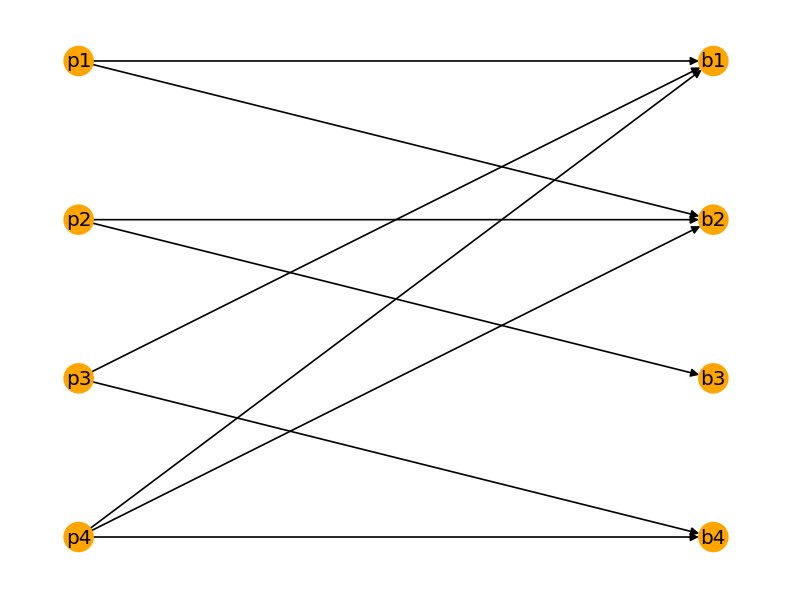

In [44]:
color_map2=[]
for i in range(8):
    color_map2.append('orange')

G4 = nx.DiGraph()
G4.add_edges_from([('p1','b1'),('p1','b2'),('p2','b2'),('p2','b3'),('p3','b1'),('p3','b4'),('p4','b1'),('p4','b2'),('p4','b4')])

pos = {'p1': [0,6], 'p2': [0,4], 'p3': [0,2], 'p4': [0,0], 'b1': [2,6] , 'b2': [2,4], 'b3':[2,2], 'b4':[2,0]}
plt.figure(dpi=120)
nx.draw(G4,pos, with_labels = True, node_color=color_map2)
# plt.savefig('C:/Users/Chiara/Desktop/network/fig/graph2.png')


**Exploit max-flow problems to find a perfect matching (if any)**

First of all we can notice that G4 is bipartite graph, we call $V_0$ the set of the people and $V_1$ the set of books. We can immediately notice that $|V_1|=|V_0|$ and so a perfect matching can exist. To find it we can use the function `networkx.algorithms.flow.maximum_flow` that find the maximum flow. First of all i add 2 node:


- a source that is linked to all the person with capacity 1
- a target that has been connected with all the books with capacity 1


There is a  $V_0$-perfect matching if and only if there exist a flow with throughput equal to the cardinality of $V_0$

(4, {'p1': {'b1': 0, 'b2': 1}, 'b1': {'b0': 1}, 'b2': {'b0': 1}, 'p2': {'b2': 0, 'b3': 1}, 'b3': {'b0': 1}, 'p3': {'b1': 1, 'b4': 0}, 'b4': {'b0': 1}, 'p4': {'b1': 0, 'b2': 0, 'b4': 1}, 'p0': {'p1': 1, 'p2': 1, 'p3': 1, 'p4': 1}, 'b0': {}})


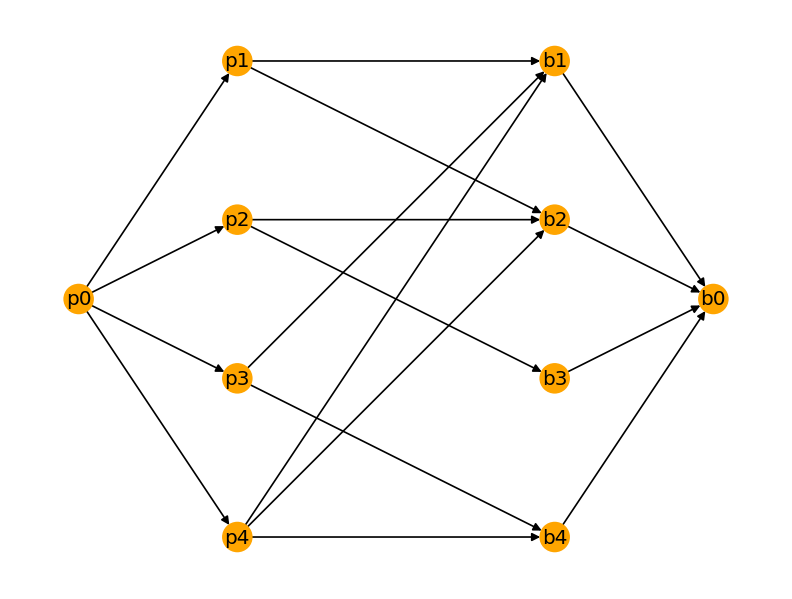

In [45]:
for i in range(4):
    G4.add_edge('p0','p'+str(i+1))
    G4.add_edge('b'+str(i+1), 'b0')


pos['p0']=[-1,3]
pos['b0']=[3,3]
color_map2.append('orange')
color_map2.append('orange')
plt.figure(dpi=120)
nx.draw(G4,pos, with_labels = True, node_color=color_map2)  

# plt.savefig('C:/Users/Chiara/Desktop/network/fig/graph3.png')


for i in G4.edges:
    G4[i[0]][i[1]]['capacity']=1
    
    
m_f = nx.algorithms.flow.maximum_flow(G4, 'p0','b0')
print(m_f)

We can see from the resul that exist a maximum flow equal to 4 that is the cardinality of the set $V_0$. We can see the result of the maximum flow algorithm on the image below.

In [46]:
def color_edge(g,dic):
        for k,v in dic.items():
            if v ==1 and 'p' in k[0] and 'p0' not in k[0]:
                g[k[0]][k[1]]['color']='m'
            else:
                g[k[0]][k[1]]['color']='black'
        return nx.get_edge_attributes(g,'color').values()        

{('p1', 'b1'): 0, ('p1', 'b2'): 1, ('b1', 'b0'): 1, ('b2', 'b0'): 1, ('p2', 'b2'): 0, ('p2', 'b3'): 1, ('b3', 'b0'): 1, ('p3', 'b1'): 1, ('p3', 'b4'): 0, ('b4', 'b0'): 1, ('p4', 'b1'): 0, ('p4', 'b2'): 0, ('p4', 'b4'): 1, ('p0', 'p1'): 1, ('p0', 'p2'): 1, ('p0', 'p3'): 1, ('p0', 'p4'): 1}


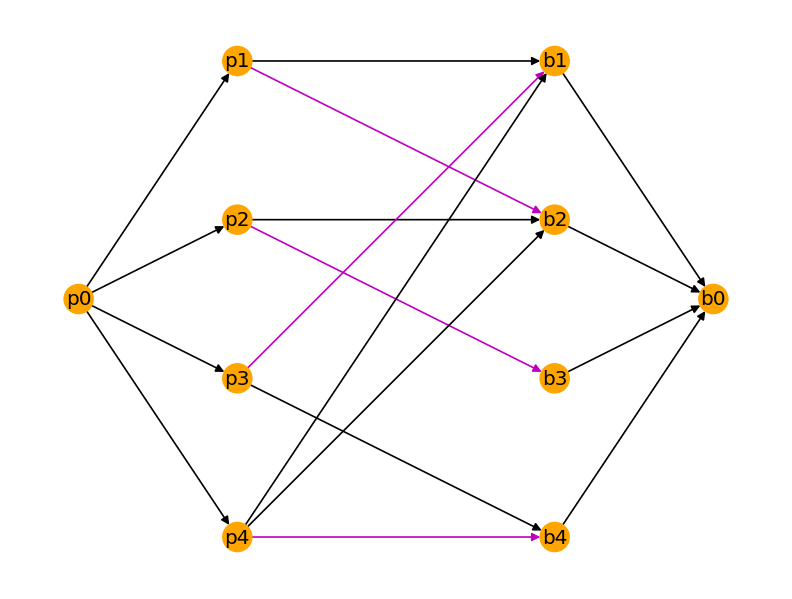

In [47]:
print(dictionary_edge_label(m_f[1],G4))
plt.figure(dpi=120)
nx.draw(G4,pos, with_labels = True,node_color=color_map2, edge_color=list(color_edge(G4,dictionary_edge_label(m_f[1],G4))))
# plt.savefig('C:/Users/Chiara/Desktop/network/fig/graph4.png')


**Assume now that there are multiple copies books, and the distribution of the number of
copies is (2, 3, 2, 2). Each person can take an arbitrary number of different books. Exploit
the analogy with max-flow problems to establish how many books of interest can be assigned
in total.**

In [48]:
def edge_flow(diz):
    res = {}
    for o_k,o_v in diz.items():
        for in_k,in_v in o_v.items():
            res[(o_k,in_k)]= in_v    
    return res

(8, {'p1': {'b1': 0, 'b2': 1}, 'b1': {'b0': 2}, 'b2': {'b0': 3}, 'p2': {'b2': 1, 'b3': 1}, 'b3': {'b0': 1}, 'p3': {'b1': 1, 'b4': 1}, 'b4': {'b0': 2}, 'p4': {'b1': 1, 'b2': 1, 'b4': 1}, 'p0': {'p1': 1, 'p2': 2, 'p3': 2, 'p4': 3}, 'b0': {}})


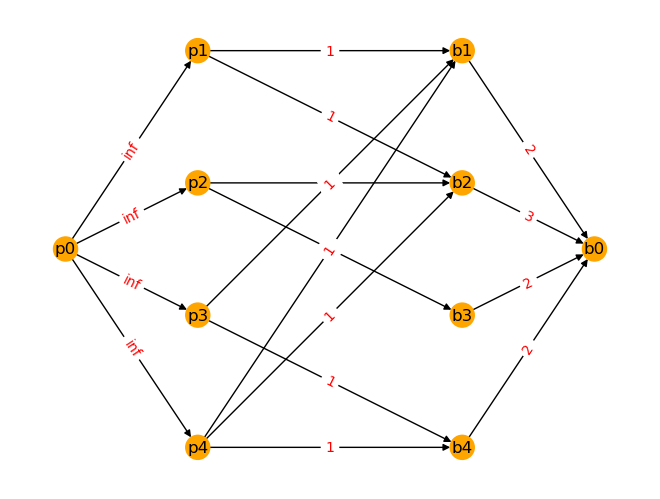

In [49]:
for i in G4.edges:
    G4[i[0]][i[1]]['capacity']=1

for i in range(4):
    G4['p0']['p'+str(i+1)]['capacity']=float('Inf')
    

    
G4['b1']['b0']['capacity']=2    
G4['b2']['b0']['capacity']=3  
G4['b3']['b0']['capacity']=2    
G4['b4']['b0']['capacity']=2 

G4_1=G4.copy()

nx.draw(G4,pos, with_labels = True, node_color=color_map2)
dd=nx.draw_networkx_edge_labels(G4_1,pos,edge_labels=dict_edge_lab(G4_1.edges, G4_1),font_color='red')  
m_f = nx.algorithms.flow.maximum_flow(G4_1, 'p0','b0')
print(m_f)
flow =edge_flow(m_f[1])

#print(res)

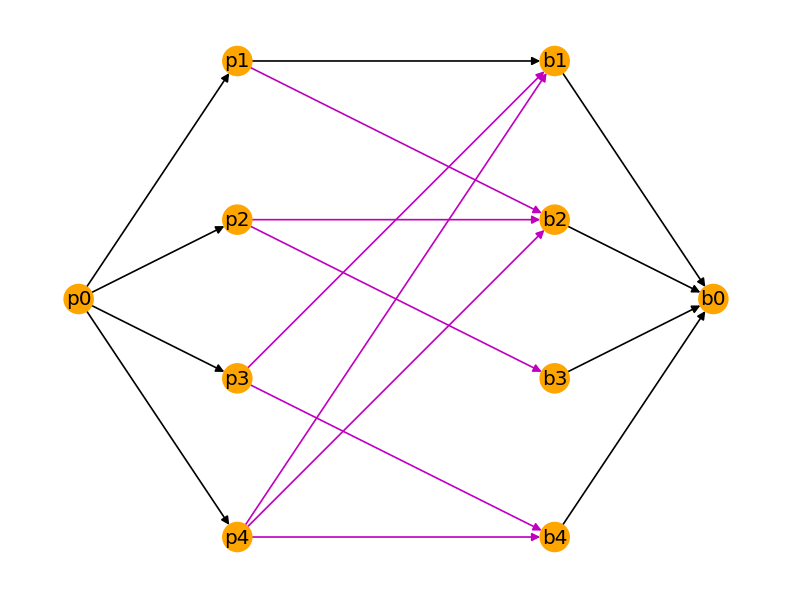

In [50]:

plt.figure(dpi=120)
nx.draw(G4_1,pos,node_color=color_map2, with_labels = True, edge_color=list(color_edge(G4_1,dictionary_edge_label(m_f[1],G4_1))))

# plt.savefig('C:/Users/Chiara/Desktop/network/fig/graph6.png')


We can see from the result of the maximum flow the miximum throughput is 8 but the number of total book is 9 so the number of books of interest that can be assigned in total is 8. Looking at the result of the function maximu_flow we can see that the flow assigned to the edge b3-b0 is less than is capacity, so we can say that the capacity assigned to this edge is greater than.  the capacity actually needed. Basically, the number of copies requested of book b3 is equal to 1 while the assigned capacity is two copies. While the number of copies of b3 required are 3 while the capacity for salable copies is only 2.

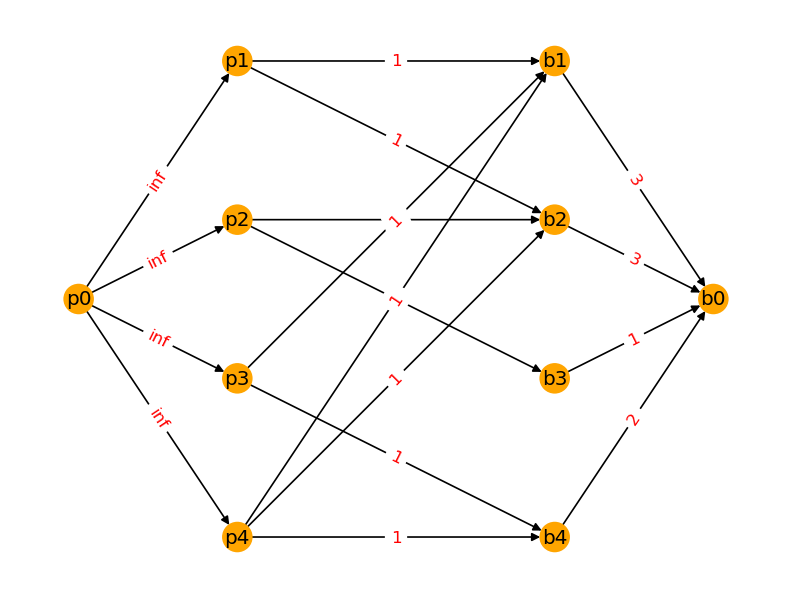

In [51]:
import collections
capacity_dict = {k:v['capacity'] for k, v in edge_flow(G4.edges._adjdict).items()} #dicit of the capacity

diff = {x: capacity_dict[x] - flow[x] for x in capacity_dict if x in flow} #difference between 

diff_filtered = {k: v for k, v in diff.items() if v>0 and v!=float('Inf')}
diff_ord = collections.OrderedDict(sorted(diff_filtered.items()))
#ordino così da avere prima gli edge con il surplus cioè quelli che vanno da b ->b0


aument=0
for k,v in diff_ord.items():
    if(k[1]=='b0'):
        aument+=v
        G4[k[0]][k[1]]['capacity'] -=v 
    if(k[0].find("p")!=-1):
        G4[k[1]]['b0']['capacity'] +=aument
        aument=0
        
plt.figure(dpi=120)
nx.draw(G4,pos,node_color=color_map2, with_labels = True)  
dd=nx.draw_networkx_edge_labels(G4,pos,edge_labels=dict_edge_lab(G4.edges, G4),font_color='red')  
plt.savefig('C:/Users/Chiara/Desktop/network/fig/graph7.png')

     

# Exercise 3


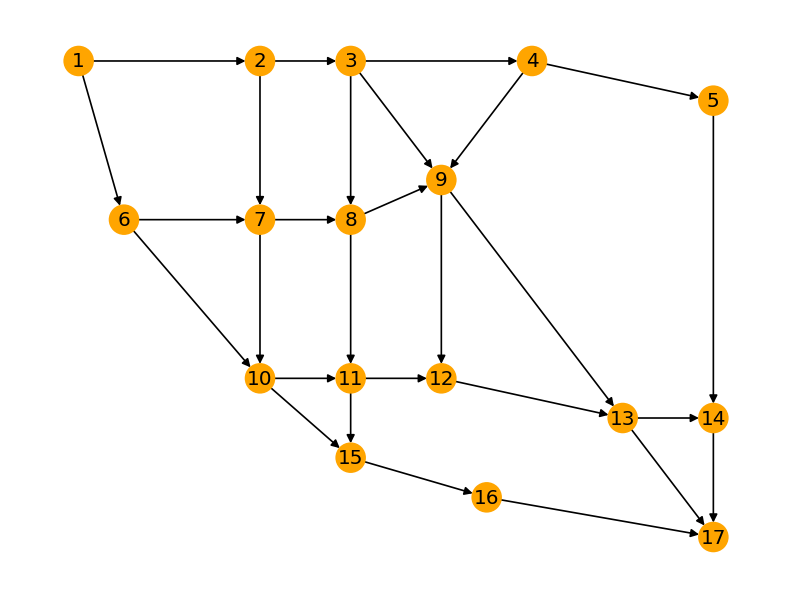

In [52]:
import scipy.io 
color_map3=[]
for i in range(17):
    color_map3.append('orange')
    
flow = scipy.io.loadmat('flow.mat')["flow"].reshape(28,)
C = scipy.io.loadmat('capacities.mat')["capacities"].reshape(28,)
B = scipy.io.loadmat('traffic.mat')['traffic']
l = scipy.io.loadmat('traveltime.mat')["traveltime"].reshape(28,)

G5 = nx.DiGraph()
G5.add_nodes_from(range(1,18))
#print(B.T)
#print(l)
#print(f)
#print(C)

edges = {}
for i,e in enumerate(B.T):
    tail = e.argmax()+1
    head = e.argmin()+1
    edges[(tail,head)] = i          
    G5.add_edge(tail, head, capacity=C[i], weight=l[i], color='b')#the weight is the travel time
    

pos = {1:[0,12], 2:[4,12], 3:[6,12], 4:[10,12], 5:[14,11], 6:[1,8], 7:[4,8], 8:[6,8], 9:[8,9], 10:[4,4], 11:[6,4],
12:[8,4], 13:[12,3], 14:[14,3], 15:[6,2], 16:[9,1], 17:[14,0]}

plt.figure(dpi=120)
nx.draw(G5, pos, with_labels=True,node_color=color_map3)
# plt.savefig('C:/Users/Chiara/Desktop/network/fig/graph8.png')



**Find the shortest path between node 1 and 17. This is equivalent to the fastest path (path with shortest traveling time) in an empty network**

The fastest path is [1, 2, 3, 9, 13, 17]


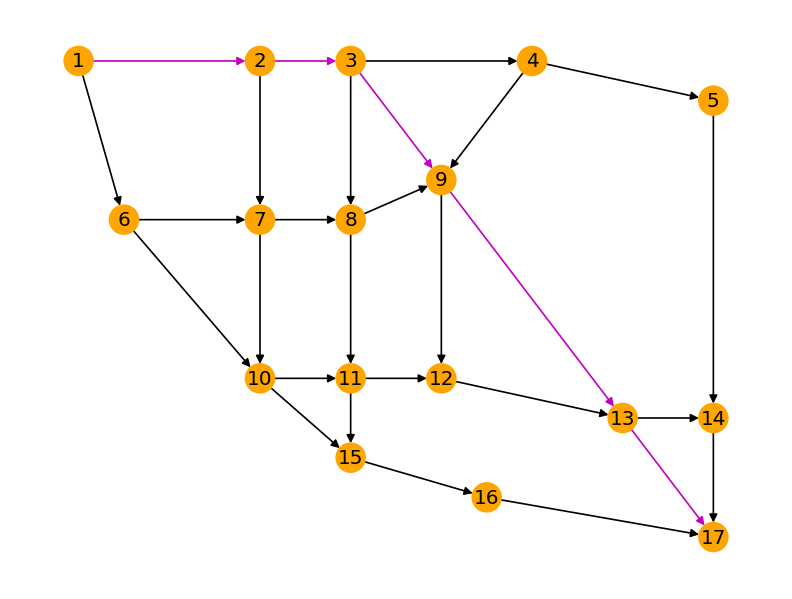

In [53]:
faster = nx.shortest_path(G5,1,17, weight='weight')
print(f"The fastest path is {faster}")

edges = [(x,faster[i+1]) for i, x in enumerate(faster) if i < len(faster)-1]

colors = ['m' if edge in edges else 'black' for edge in G5.edges]

plt.figure(dpi=120)
nx.draw(G5,pos,  edge_color=colors,with_labels=True, node_color=color_map3)
# plt.savefig('C:/Users/Chiara/Desktop/network/fig/graph9.png')


**Find the maximum flow between node 1 and 17**

(22448, {1: {2: 8741, 6: 13707}, 2: {3: 8741, 7: 0}, 3: {4: 0, 8: 0, 9: 8741}, 4: {5: 0, 9: 0}, 5: {14: 0}, 6: {7: 4624, 10: 9083}, 7: {8: 4624, 10: 0}, 8: {9: 4624, 11: 0}, 9: {13: 6297, 12: 7068}, 10: {11: 825, 15: 8258}, 11: {12: 825, 15: 0}, 12: {13: 7893}, 13: {14: 3835, 17: 10355}, 14: {17: 3835}, 15: {16: 8258}, 16: {17: 8258}, 17: {}})


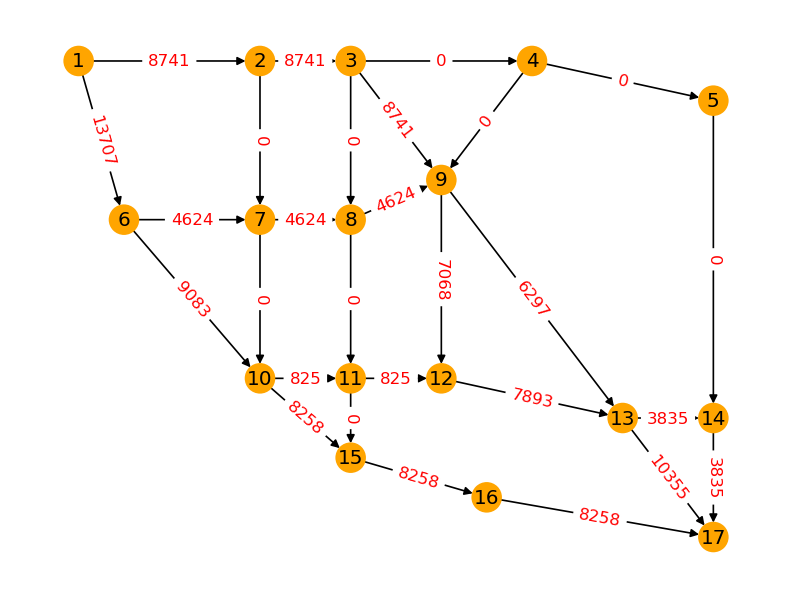

In [54]:
m_f_5 = nx.algorithms.flow.maximum_flow(G5, 1,17)
print(m_f_5)
#print(dictionary_edge_label(m_f_5[1],G6))
G6 = G5

plt.figure(dpi=120)
nx.draw(G6,pos, with_labels = True,node_color=color_map3)
dd=nx.draw_networkx_edge_labels(G5,pos,edge_labels=dictionary_edge_label(m_f_5[1],G6),font_color='red')

# plt.savefig('C:/Users/Chiara/Desktop/network/fig/graph10.png')




**Given the flow vector in flow.mat, compute the external inflow ν satisfying Bf = ν.**


In [22]:
#print(B)
v = B@flow
print(v)

[ 16806   8570  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


**Find the social optimum $f^*$ with respect to the delays on the different links $\tau_e(fe)$. For this, minimize the cost function  $$ \sum_{e \in E}f_e\tau_e(f_e) = \sum_{e \in E} \frac{f_e l_e}{1 -  \frac{f_e}{c_e}} = \sum_{e \in E} ( \frac{l_e c_e}{1 -  \frac{f_e}{c_e}} - l_e c_e)$$**

In [23]:
import cvxpy as cp

v2=np.zeros(17, dtype=int)
v2[0]=v[0]
v2[16]=-v[0]
#print(v2)
f = cp.Variable(len(G5.edges))
constraints = [B @ f == v2, f >= 0, f <= C]

num=l*C
den= (1-cp.multiply(f,cp.inv_pos(C)))
cost =cp.Minimize(cp.sum(cp.multiply(num,cp.inv_pos(den)) - num)) 
res = cp.Problem(cost, constraints).solve()
#print(cost)
print(f'The social optimum flow vector is:\n', f.value)
print(f'\n The cost of the social optimum is:', res)
print(f.shape)
f_so=f.value

(CVXPY) Nov 09 08:22:08 PM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: Impossibile trovare il modulo specificato.')
The social optimum flow vector is:
 [6.64219910e+03 6.05893789e+03 3.13232779e+03 3.13232589e+03
 1.01638009e+04 4.63831664e+03 3.00634073e+03 2.54263460e+03
 3.13154448e+03 5.83261212e+02 1.45164550e-02 2.92659559e+03
 1.89781986e-03 3.13232589e+03 5.52548426e+03 2.85427264e+03
 4.88644874e+03 2.21523712e+03 4.63720641e+02 2.33768761e+03
 3.31799129e+03 5.65567890e+03 2.37310712e+03 1.99567283e-03
 6.41411626e+03 5.50543301e+03 4.88645073e+03 4.88645073e+03]

 The cost of the social optimum is: 25943.62261121288
(28,)


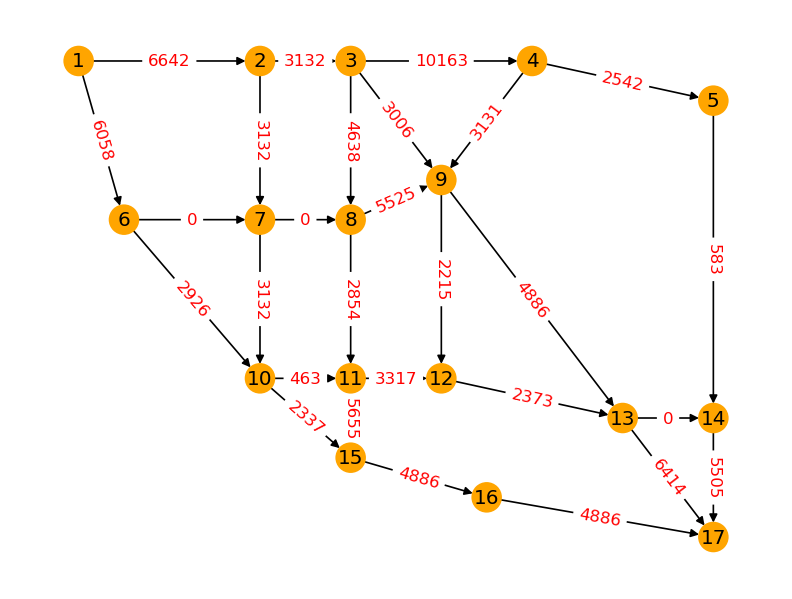

In [55]:
G7 = G5
d_e_l={}
i=0
for e in G5.edges:
    d_e_l[e]=int(f.value[i])
    i=i+1
    

plt.figure(dpi=120)
nx.draw(G7,pos, with_labels = True,node_color=color_map3)
dd=nx.draw_networkx_edge_labels(G5,pos,edge_labels=d_e_l,font_color='red')
plt.savefig('C:/Users/Chiara/Desktop/network/fig/graph11.png')

**Find the Wardrop equilibrium $f^{(0)}$. For this, use the cost function $$ \sum_{e \in E} \int_{0}^{f_e} \tau_e (s)ds$$**

First we have to calculate the integeral of $\tau_e$ that is $\int_{0}^{f_e} \frac{l_e}{1 -  \frac{f_e}{c_e}} = - l_e c_e \log (c_e - f_e)$  

In [56]:
l_c = -cp.multiply(l,C) 
log_ce_fe= cp.log(C-f)
tot = cp.Minimize(cp.sum(cp.multiply(l_c, log_ce_fe)))
res = cp.Problem(tot, constraints).solve()
print(f'The Warbrop equilibrium \n', f.value)
print('costi:',res)
f_w1=f.value

The Warbrop equilibrium 
 [6.71564933e+03 6.71564464e+03 2.36740913e+03 2.36740874e+03
 1.00903506e+04 4.64539440e+03 2.80384556e+03 2.28355729e+03
 3.41848027e+03 4.68630001e-03 1.76815987e+02 4.17141953e+03
 3.88215600e-04 2.36740874e+03 5.44495615e+03 2.35317274e+03
 4.93333694e+03 1.84155353e+03 6.97104258e+02 3.03649694e+03
 3.05027647e+03 6.08677341e+03 2.58651317e+03 5.27016717e-04
 6.91874051e+03 4.95392191e+03 4.93333747e+03 4.93333747e+03]
costi: -236747.43747293012


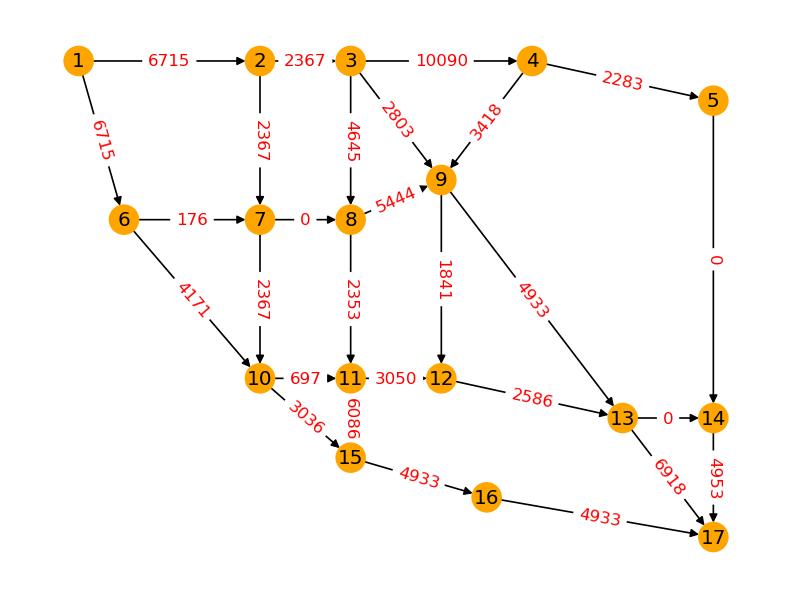

In [57]:
G8 = G5
d_e_l={}
i=0
for e in G5.edges:
    d_e_l[e]=int(f.value[i])
    i=i+1
    

plt.figure(dpi=120)
nx.draw(G7,pos, with_labels = True,node_color=color_map3)
dd=nx.draw_networkx_edge_labels(G5,pos,edge_labels=d_e_l,font_color='red')
# plt.savefig('C:/Users/Chiara/Desktop/network/fig/graph12.png')



In [58]:
 print(f'The difference between the social optimum flow vector and the Wardrop equilibrium is:\n',np.linalg.norm(f_so-f_w1))
   

The difference between the social optimum flow vector and the Wardrop equilibrium is:
 2473.3339393347655


**Introduce tolls, such that the toll on link e is $\omega_e = f^{*}_e\tau_e^{'}(f^{*}_e)$ where $f^{*}_e$ is the flow at the system optimum. Now the delay on link e is given by $\tau_e(f_e)+\omega_e$ compute the new Wardrop equilibrium $f^{(\omega^{*})}$. What do you observe?**

First of all I calculate the derivative of $\tau_e(f_e)$: $$\frac{c_e l_e}{(c_e-f^{*}_e)^{2}}$$

In [59]:
num_omega = cp.multiply(C,l)
ce_fe = C - f_so
den_omega = cp.power(ce_fe,2)
derv_tau = cp.multiply(num_omega, cp.inv_pos(den_omega))
omega = cp.multiply(f_so,derv_tau)
print(omega.value)

[1.92210631e+00 1.85064818e-01 5.16694986e-02 1.05176371e-01
 1.44072968e+00 4.69146428e-01 1.07571171e-01 5.69255527e-02
 2.78803191e-01 6.15501126e-03 1.74005540e-07 7.53489887e-02
 2.18581142e-08 1.26658219e-01 4.81817175e-01 8.20545054e-02
 6.85716144e-02 1.73792008e-02 1.50892092e-03 1.38933840e-02
 6.58964442e-02 2.63303327e-01 6.70070611e-02 1.14962944e-08
 4.09840401e-01 2.87273604e-01 1.91578098e-01 5.27755447e-01]


Now to find the Wardrop equilibrium we will use the cost function $$ \sum_{e \in E} \int_{0}^{f_e} \tau_e (s) + \omega_e ds$$

First we have to calculate the integeral that is $\int_{0}^{f_e} \frac{l_e}{1 -  \frac{f_e}{c_e}} + \omega_e ds= - l_e c_e \log (c_e - f_e) + \omega_{e}f_e$  

In [60]:
log_ce_fs= cp.log(C-f)
interm = cp.multiply(l_c, log_ce_fs) + cp.multiply(f,omega) 
tot= cp.Minimize(cp.sum(interm))
res=cp.Problem(tot, constraints).solve()
print(f'The Wardrop equilibrium with tolls is:\n',f.value)
f_w = f.value

The Wardrop equilibrium with tolls is:
 [6.64297447e+03 6.05907644e+03 3.13247229e+03 3.13247200e+03
 1.01630254e+04 4.63825875e+03 3.00632655e+03 2.54233808e+03
 3.13148797e+03 5.83898031e+02 1.14255443e-03 2.92660301e+03
 2.86108921e-04 3.13247200e+03 5.52476667e+03 2.85422630e+03
 4.88637059e+03 2.21583023e+03 4.63989614e+02 2.33745341e+03
 3.31821555e+03 5.65566896e+03 2.37303537e+03 3.63323221e-04
 6.41412156e+03 5.50550737e+03 4.88637096e+03 4.88637096e+03]


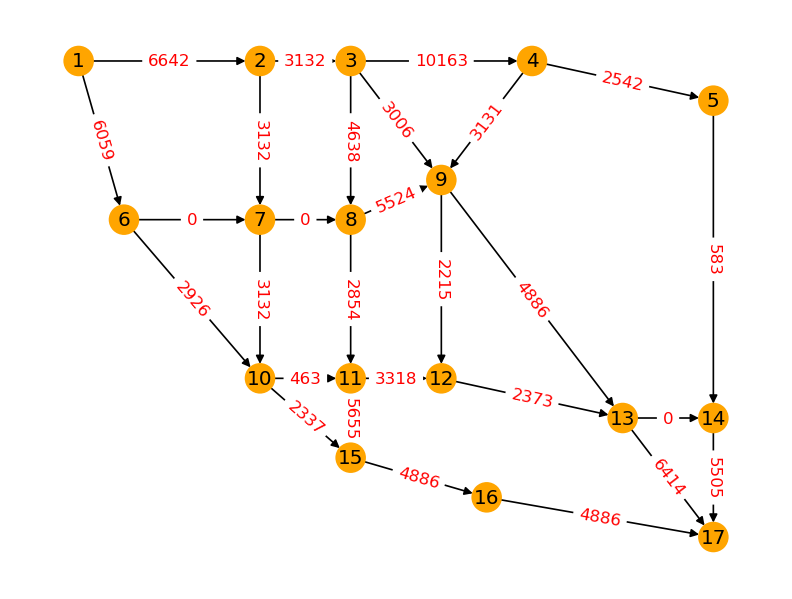

In [61]:
G9 = G5
d_e_l={}
i=0
for e in G5.edges:
    d_e_l[e]=int(f.value[i])
    i=i+1
    

plt.figure(dpi=120)
nx.draw(G9,pos, with_labels = True,node_color=color_map3)
dd=nx.draw_networkx_edge_labels(G5,pos,edge_labels=d_e_l,font_color='red')
plt.savefig('C:/Users/Chiara/Desktop/network/fig/graph13.png')

In [62]:
 print(f'The difference between the social optimum flow vector and the Wardrop equilibrium with tolls is:\n',np.linalg.norm(f_so-f_w))
   

The difference between the social optimum flow vector and the Wardrop equilibrium with tolls is:
 1.6916774191782142


As you can see, the result of the Wardrop equilibrium with the tool is identical to the result of the Wardrop equilibrium without tool (except for small computational and approximation errors). 

**Instead of the total travel time, let the cost for the system be the total additional delay
compared to the total delay in free flow, given by $$\psi_e(f_e) = f_e(\tau_e(f_e)-l_e)$$ subject to the flow constraints. Compute the system optimum $f^{*}$ for the costs above. Construct tolls $\omega^{*}$ such that the Wardrop equilibrium $f^{(w^{*})}$ coincides with $f^{*}$. Compute the new
Wardrop equilibrium with the constructed tolls $f^{(ω^{∗})}$ to verify your result.**

In [63]:
interm = cp.multiply(l,cp.inv_pos(1-cp.multiply(f,cp.inv_pos(C))))
tad = cp.multiply(f,interm-l)
print(tad.value)

[3.06733545e+03 4.32578297e+02 1.23884896e+02 2.35025413e+02
 3.78382011e+03 7.25839980e+02 1.92399177e+02 8.96037618e+01
 4.38869519e+02 3.40901191e+00 1.56478597e-11 1.48570331e+02
 9.42801674e-13 2.68902636e+02 1.04224480e+03 1.44058529e+02
 2.12445490e+02 3.09138065e+01 6.70872138e-01 2.48946085e+01
 1.35587340e+02 7.06640528e+02 1.02490706e+02 7.60422004e-13
 1.00045237e+03 6.21277329e+02 5.54595751e+02 1.05282557e+03]


To compute the system optimum $f^{*}$ for $\psi_e(f_e)$ we have to minimize: $$ \sum_{e \in E}f_e\tau_e(f_e) - \sum_{e \in E}f_e l_e $$
We have already calculated the first part, it remains for us to calculate the second and minimize the whole

In [64]:
first_part = cp.sum(cp.multiply(l*C,cp.inv_pos(1-cp.multiply(f,cp.inv_pos(C)))) - (l*C))
second_part = cp.sum(cp.multiply(f,l))
cost = cp.Minimize(first_part-second_part)
res= cp.Problem(cost, constraints).solve()

print(f'The social optimum flow vector calculated with the new cost function is:\n', f.value)
print(f'The cost of the social optimum is:\n', res)
new_sof =f.value

The social optimum flow vector calculated with the new cost function is:
 [6.65329658e+03 5.77466230e+03 3.41971657e+03 3.41971062e+03
 1.01527034e+04 4.64278036e+03 3.10584008e+03 2.66218478e+03
 3.00907935e+03 8.78634280e+02 7.42401749e-03 2.35493830e+03
 5.94907576e-03 3.41971062e+03 5.50992306e+03 3.04369256e+03
 4.88180506e+03 2.41557456e+03 4.43662730e+02 2.00804968e+03
 3.48735309e+03 5.49540277e+03 2.20377848e+03 2.20338871e-03
 6.30070364e+03 5.62348910e+03 4.88180726e+03 4.88180726e+03]
The cost of the social optimum is:
 15095.513524607872


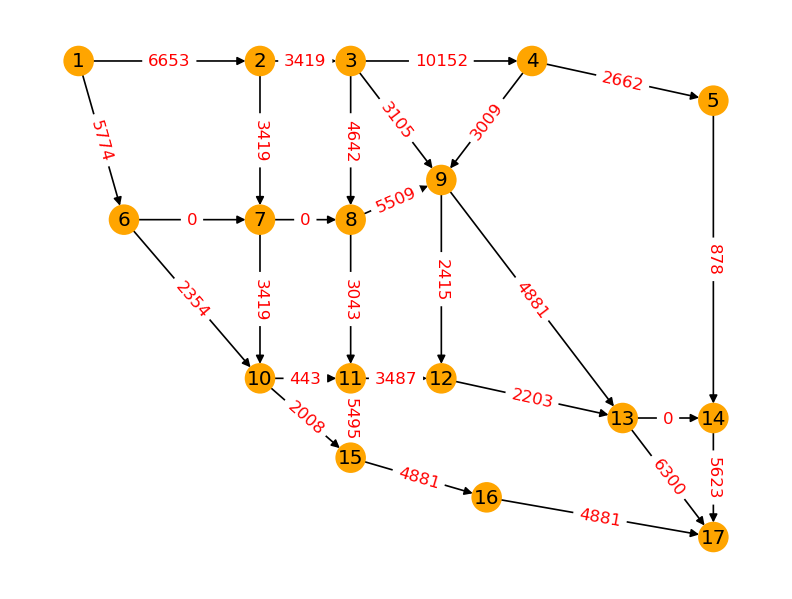

In [65]:
G10 = G5
d_e_l={}
i=0
for e in G5.edges:
    d_e_l[e]=int(f.value[i])
    i=i+1

plt.figure(dpi=120)
nx.draw(G10,pos, with_labels = True,node_color=color_map3)
dd=nx.draw_networkx_edge_labels(G5,pos,edge_labels=d_e_l,font_color='red')
# plt.savefig('C:/Users/Chiara/Desktop/network/fig/graph14.png')


To make the Wardrop equilibrium $f^{(w^{*})}$ coincides with $f^{*}$ we have to construct $\omega^{*}  =\psi_e^{'}(f_e^{*}) -\tau_e(f^{*}_e)$ where $\tau_e$  is
$\frac{l_e}{1 -  \frac{f_e}{c_e}}$ and the derivative of $\psi_e$ is $ \tau_{e}(f^{*}_{e}) + f^{*}_{e}\tau_{e}^{'}(f^{*}_{e}) - l_{e}$, so the $\omega^{*}  = f^{*}_{e}\tau_{e}^{'}(f^{*}_{e}) - l_{e} $ that is:$$\frac{c_e l_e}{(c_e-f^{*}_e)^{2}} - l_e$$
where $f^{*}_e$ is the vector we have just calculated

In [66]:
num_o = cp.multiply(C,l)
den_o = cp.power((C-new_sof),2)
derv_tau = cp.multiply(num_o, cp.inv_pos(den_o)) 
omega_new = cp.multiply(new_sof, derv_tau) -l
print(omega_new.value)

[ 1.80001065  0.10787842 -0.06927752 -0.06288316  1.30035376  0.39307586
  0.02231423  0.0058706   0.10664478 -0.09535448 -0.10666991 -0.05422543
 -0.11232993 -0.02931628  0.35478444  0.01457862 -0.00690164 -0.03684345
 -0.03122885 -0.02402767  0.00713838  0.12767956 -0.02072892 -0.05416699
  0.28455189  0.24089862  0.02614607  0.37713461]


Now we verify that the constructed tolls is correct by calculating the Wardrop.


First we have to calculate the integeral that is $\int_{0}^{f_e} \frac{l_e}{1 -  \frac{f_e}{c_e}}  + \omega_e  ds= - l_e c_e \log (c_e - f_e)+ \omega_{e}f_e$  

In [67]:
l_c= - cp.multiply(l,C)
first_comp= cp.multiply(l_c, cp.log(C-f))
sec_comp=cp.multiply(omega_new,f)
somm= cp.Minimize(cp.sum(first_comp+sec_comp))
res=cp.Problem(somm,constraints).solve()


print(f'The Wardrop equilibrium with tolls is:\n',f.value)
f_w_new = f.value

The Wardrop equilibrium with tolls is:
 [6.65313186e+03 5.77541861e+03 3.41948015e+03 3.41947940e+03
 1.01528681e+04 4.64242327e+03 3.10549323e+03 2.66173319e+03
 3.00916880e+03 8.77713250e+02 9.41382406e-04 2.35593752e+03
 7.52040144e-04 3.41947940e+03 5.51044483e+03 3.04337622e+03
 4.88171189e+03 2.41464328e+03 4.43760984e+02 2.00850266e+03
 3.48713691e+03 5.49563957e+03 2.20406967e+03 2.93914015e-04
 6.30073869e+03 5.62354908e+03 4.88171218e+03 4.88171218e+03]


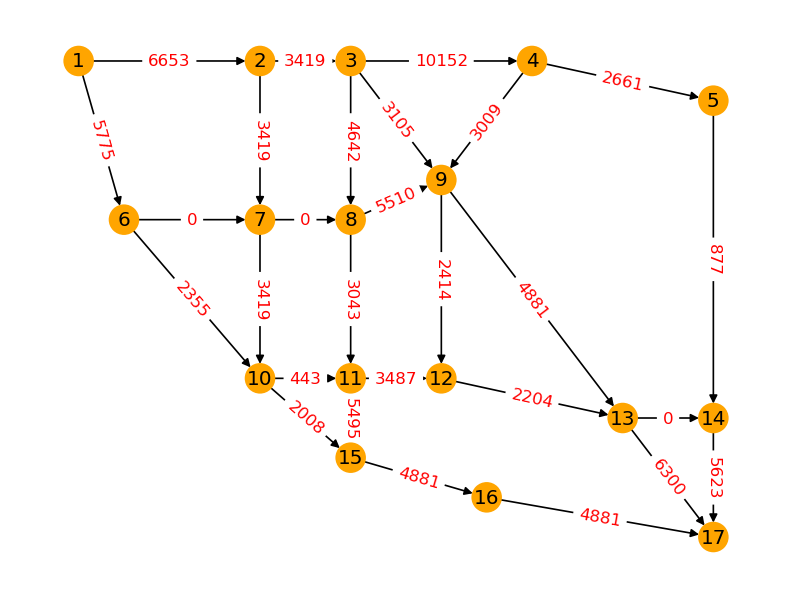

In [68]:
G11 = G5
d_e_l={}
i=0
for e in G5.edges:
    d_e_l[e]=int(f.value[i])
    i=i+1

plt.figure(dpi=120)
nx.draw(G11,pos, with_labels = True,node_color=color_map3)
dd=nx.draw_networkx_edge_labels(G5,pos,edge_labels=d_e_l,font_color='red')

plt.savefig('C:/Users/Chiara/Desktop/network/fig/graph15.png')
    


In [69]:
 print(f'The difference between the social optimum flow vector and the Wardrop equilibrium with tolls is:\n',np.linalg.norm(new_sof-f_w_new))
 

The difference between the social optimum flow vector and the Wardrop equilibrium with tolls is:
 2.183860428881009
